<a href="https://colab.research.google.com/github/Wishmi-Sasika/MLOM-Labs/blob/main/MLOM_Lab_Exam_01_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
# Importing the data
data = pd.read_csv('https://raw.githubusercontent.com/lakminia/Market_data_IT3071/main/Market_data_set.csv')

In [3]:
data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,Product_SK,PRODUCTCODE,Customer_SK,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,1,S10_1678,1,USA,Small
1,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,2,S10_1678,2,France,Small
2,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,3,S10_1678,3,France,Medium
3,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,4,S10_1678,4,USA,Medium
4,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,5,S10_1678,5,USA,Medium


In [4]:
data.shape

(2823, 15)

In [5]:
data['DEALSIZE'].replace( {'Small': 0,'Medium': 1, 'Large': 2}, inplace=True)

In [6]:
data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,Product_SK,PRODUCTCODE,Customer_SK,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,1,S10_1678,1,USA,0
1,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,2,S10_1678,2,France,0
2,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,3,S10_1678,3,France,1
3,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,4,S10_1678,4,USA,1
4,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,5,S10_1678,5,USA,1


In [7]:
for column_name in data:
      print(column_name)
      s = data['DEALSIZE'].unique()
      print(s)

QUANTITYORDERED
[0 1 2]
PRICEEACH
[0 1 2]
ORDERLINENUMBER
[0 1 2]
SALES
[0 1 2]
STATUS
[0 1 2]
QTR_ID
[0 1 2]
MONTH_ID
[0 1 2]
YEAR_ID
[0 1 2]
PRODUCTLINE
[0 1 2]
MSRP
[0 1 2]
Product_SK
[0 1 2]
PRODUCTCODE
[0 1 2]
Customer_SK
[0 1 2]
COUNTRY
[0 1 2]
DEALSIZE
[0 1 2]


In [8]:
data.isna().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
Product_SK         0
PRODUCTCODE        0
Customer_SK        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [9]:
# Ndata = pd.get_dummies('STATUS','PRODUCTLINE', 'PRODUCTCODE', 'COUNTRY')
ndata = pd.get_dummies(data, columns = ['STATUS','PRODUCTLINE', 'PRODUCTCODE', 'COUNTRY'])

In [10]:
x = ndata.drop('DEALSIZE', axis = 1)
y = ndata['DEALSIZE']

In [11]:
x.shape

(2823, 151)

In [12]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: DEALSIZE, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=4, shuffle=True)

In [14]:
# Defining the model
model = tf.keras.Sequential([


    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compiling the model
model.compile(optimizer=optimizer,
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
# fitting the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data = (X_test, y_test))

Epoch 1/30
60/60 [==============================] - 10s 18ms/step - loss: 14.3113 - accuracy: 0.8599 - val_loss: 3.8412 - val_accuracy: 0.8637
Epoch 2/30
60/60 [==============================] - 0s 8ms/step - loss: 0.9426 - accuracy: 0.9603 - val_loss: 0.3272 - val_accuracy: 0.9635
Epoch 3/30
60/60 [==============================] - 1s 11ms/step - loss: 1.1979 - accuracy: 0.9376 - val_loss: 0.8621 - val_accuracy: 0.9571
Epoch 4/30
60/60 [==============================] - 0s 8ms/step - loss: 1.3745 - accuracy: 0.9482 - val_loss: 6.1536 - val_accuracy: 0.9474
Epoch 5/30
60/60 [==============================] - 1s 10ms/step - loss: 2.4736 - accuracy: 0.9408 - val_loss: 0.7083 - val_accuracy: 0.9399
Epoch 6/30
60/60 [==============================] - 0s 8ms/step - loss: 0.9724 - accuracy: 0.9519 - val_loss: 0.9046 - val_accuracy: 0.9388
Epoch 7/30
60/60 [==============================] - 0s 8ms/step - loss: 1.0947 - accuracy: 0.9397 - val_loss: 0.5718 - val_accuracy: 0.9549
Epoch 8/30
60/6

In [16]:
results = model.evaluate(X_test, y_test, batch_size=32)

30/30 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9850


In [17]:
predictions = model.predict(X_test[10:])
predictions

29/29 [==============================] - 0s 2ms/step


array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.3987563e-36, 0.0000000e+00],
       [1.0000000e+00, 2.7835019e-27, 0.0000000e+00],
       ...,
       [1.0000000e+00, 3.4095305e-36, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [18]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

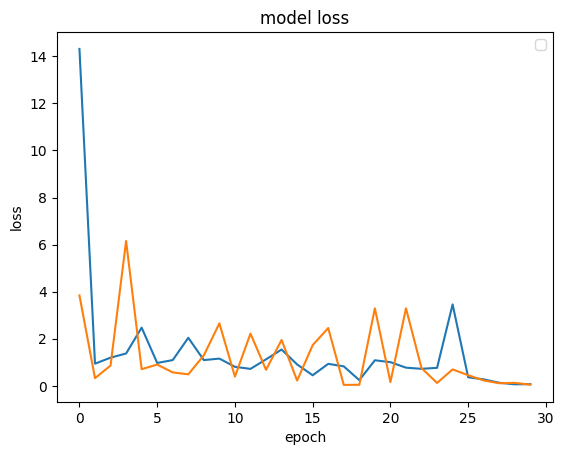

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()



Text(0.5, 0, 'epoch')

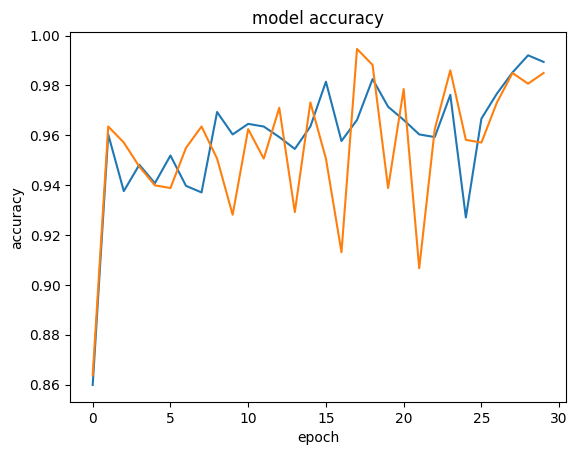

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')